In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Make the dataset
N = 3000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

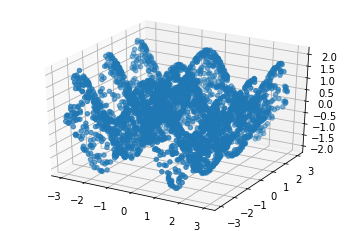

In [5]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [6]:
# Build the model
model = nn.Sequential(
                        nn.Linear(2, 128),
                        nn.ReLU(),
                        nn.Linear(128, 1)
                    )

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [7]:
# Train the model
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
    # Stuff to store
    train_losses = np.zeros(epochs)

    for it in range(epochs):
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
            
        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Save losses
        train_losses[it] = loss.item()
            
        if (it + 1) % 50 == 0:
            print(f'Epoch {it+1}/{epochs}, Train Loss: {loss.item():.4f}')

    return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1)) # Y needs N,D shape
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.7085
Epoch 100/1000, Train Loss: 0.3520
Epoch 150/1000, Train Loss: 0.2304
Epoch 200/1000, Train Loss: 0.0733
Epoch 250/1000, Train Loss: 0.0193
Epoch 300/1000, Train Loss: 0.0081
Epoch 350/1000, Train Loss: 0.0051
Epoch 400/1000, Train Loss: 0.0038
Epoch 450/1000, Train Loss: 0.0111
Epoch 500/1000, Train Loss: 0.0028
Epoch 550/1000, Train Loss: 0.0038
Epoch 600/1000, Train Loss: 0.0025
Epoch 650/1000, Train Loss: 0.0217
Epoch 700/1000, Train Loss: 0.0022
Epoch 750/1000, Train Loss: 0.0021
Epoch 800/1000, Train Loss: 0.0027
Epoch 850/1000, Train Loss: 0.0020
Epoch 900/1000, Train Loss: 0.0021
Epoch 950/1000, Train Loss: 0.0020
Epoch 1000/1000, Train Loss: 0.0022


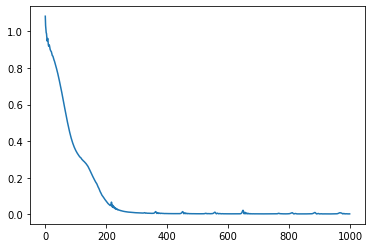

In [8]:
plt.plot(train_losses)